In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import datetime as dt
import pandas_datareader as web

In [2]:
style.use('ggplot')

In [23]:
# %matplotlib inline
plt.ioff()

In [4]:
start = dt.datetime(2000, 1, 1)
end   = dt.datetime(2017, 7, 25)

In [5]:
df = web.DataReader('AAPL','yahoo',start, end, retry_count=5)

In [6]:
# df.head()

In [7]:
df.to_csv('Data/AAPL.csv', sep=',')

In [8]:
df1 = pd.read_csv('Data/AAPL.csv', sep=',', index_col=0, parse_dates=True)

In [9]:
# df1.head()

In [10]:
# df['Adj Close'].plot()
# plt.show()

In [15]:
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

In [16]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
1999-12-31,3.604911,3.674107,3.553571,3.671875,3.303425,40952800,3.303425
2000-01-03,3.745536,4.017857,3.631696,3.997768,3.596616,133949200,3.450020
2000-01-04,3.866071,3.950893,3.613839,3.660714,3.293384,128094400,3.397808
2000-01-05,3.705357,3.948661,3.678571,3.714286,3.341579,194580400,3.383751
2000-01-06,3.790179,3.821429,3.392857,3.392857,3.052405,191993200,3.317482


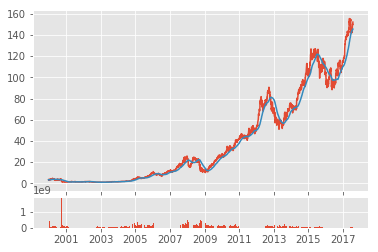

In [24]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])
plt.show()